In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This is one dataset up-to-date through March 17, 2018.
url = 'https://osf.io/e2hyd/download'
urllib.request.urlretrieve(url, 'data.csv')
data = pd.read_csv('data.csv', parse_dates=['Date created'])
data = data.reset_index()

Text(0,0.5,'Number of engrXiv prints')

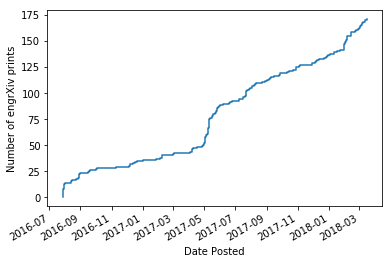

In [3]:
outplot = data.plot(x='Date created', y='index', drawstyle='steps', legend=False)
outplot.set_xlabel("Date Posted")
outplot.set_ylabel("Number of engrXiv prints")